<div class="alert alert-block alert-success">
    
    
## <center> OnMart Superstore </center>


<br>

**Author: Atef Bader**

**Created: 8/19/2021**
    
<br>
Date: 31 October 2021<br>
Edited by: Dr. Dill and Dr. Arroyo <br>
- Assigned points to each question<br>
- Clarified each question <br>
- Added bonus questions
    <br>
    
    
</div>

<div class="alert alert-block alert-danger">
    
    

### Deliverables: 
- Submit on Canvas two files with the format of <b>Lastname_Assignment_5</b>:
    1. Your IPYNB script that has your source code and output for the requirements listed below
    2. Your HTML document that has your source code and output for the requirements listed below

<br>
    
</div>


<div class="alert alert-info">

        
## High Level Description:

The OnMart superstore is an online retailer that has a business model similar to Amazon, Walmart, and Target. The online superstore has several departments that are selling products in different categories: Electronics, Clothing, Grocery, Furniture, Sports, etc.
    
</div>

<hr style="border:5px solid orange"/>

<div class="alert alert-info">
        
## Logistic and Supply Chain Network:


For its supply chain and its delivery network/vehicles, OnMart has several warehouses and distributions centers. Every warehouse supplies a number of distribution centers and every distribution center delivers packages in different zip codes.  
    

The logistics and supply chain network for OnMart has the following characteristics:
1.	It delivers packages to customers distributed across 785 zip codes 
2.	It has 97 distribution centers that are located in 97 zip codes
3.	It has 17 warehouses that are located in 17 zip codes
4.	It serves customers in 8 cities located in different states in the US
5.	Every serving facility (distribution center or warehouse) has a unique pair of latitude and longitude 

Even though OnMart has many warehouses that supply distribution centers in the different cities, not every city has warehouses; Nashville and Atlanta do not have warehouses. Currently, Nashville is being supplied by products shipped from Chicago warehouses and Atlanta is being supplied by products shipped from Miami warehouses.  The following figure illustrates the structure of the OnMart delivery network:
</div>

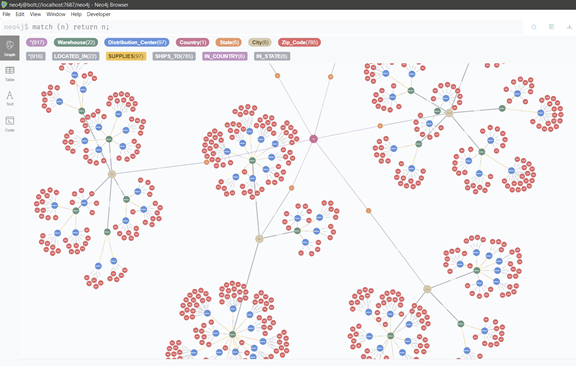

<hr style="border:5px solid orange"/>

<div class="alert alert-info">
The following is a sample of the delivery zip codes, warehouses, distribution centers, cities, and state:
<br>
<br>
</div>

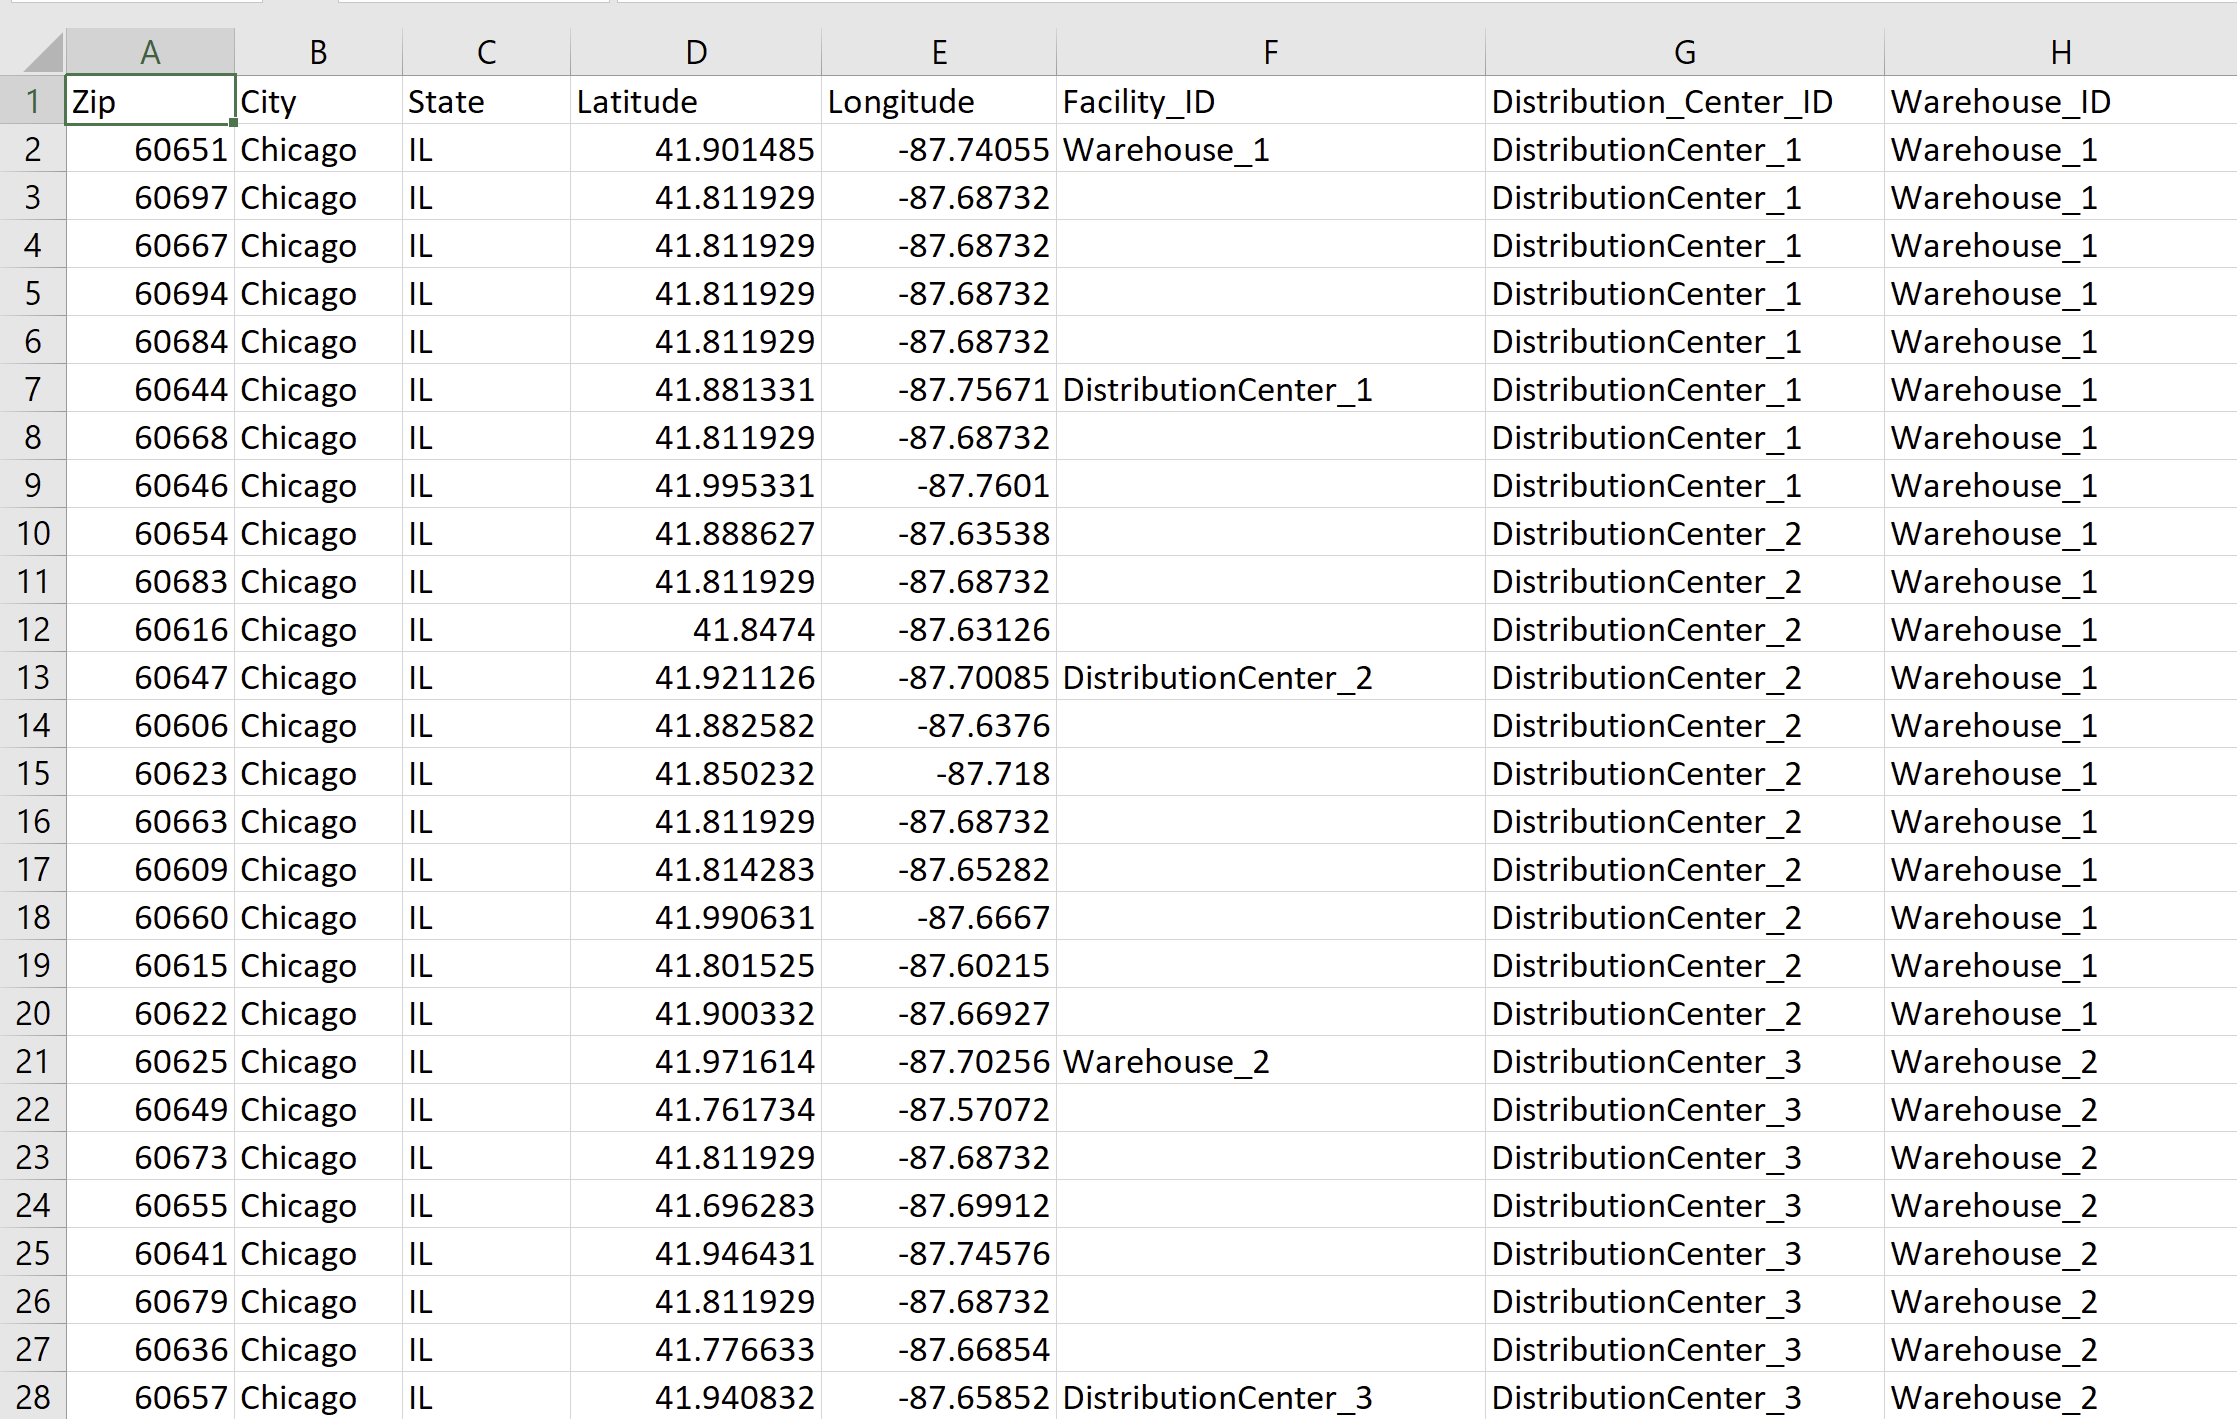

<hr style="border:5px solid orange"/> 

<div class="alert alert-info">
# Departments and Products
OnMart has several departments that are selling products in different categories.  The following is a sample of these departments and the different product categories they sell:
</div>



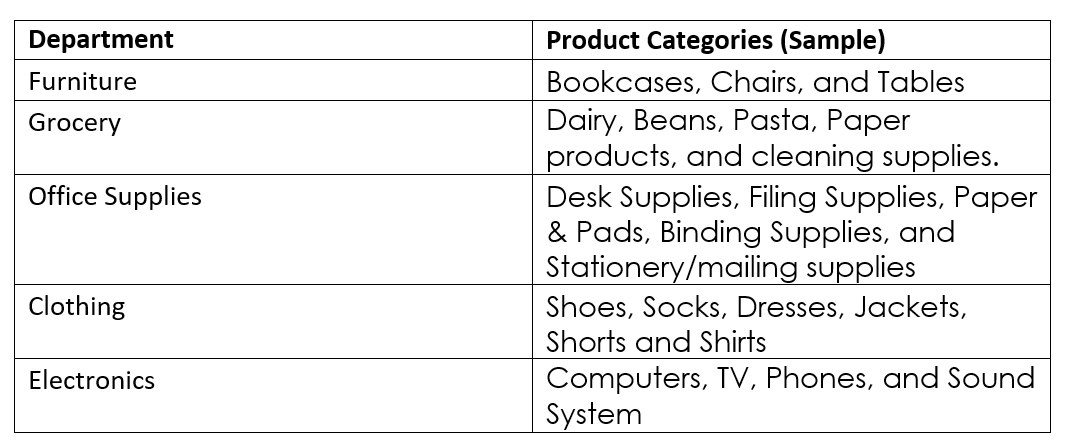

<hr style="border:5px solid orange"/>

<div class="alert alert-info">

# Customers and Purchases


Customers place their orders online and the order might have products from the different categories in the different departments. For every order there will be a unique order number generated. When the customers place the order online, the customer will enter home address, delivery address, and shipping class. 

<br>

The customer is provided with the following capabilities:
- Purchase items.
- Return purchased items. 
- Review and rate purchased items.
- Some customers are connected with friends in a Social Network and can share product description of purchased items with friends in the social network.


</div>

<hr style="border:5px solid orange"/>


<div class="alert alert-info">

<b>Connection instructions</b>
- Connect to NU VPN
- Connect to DSCC Postgres Server via psycog2 connection string (provided in code below)
- Connect to **onmart** database (provided in code below)
- Use the two tables: **transactions_log** and **logistics_supply_chain_network**

</div>

<hr style="border:5px solid orange"/>


<br>


In [1]:
import pandas as pd
import datetime
from datetime import datetime, date, timedelta
import time
import numpy as np
import plotly
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px
import psycopg2
import csv

from area import area

from psycopg2.extensions import ISOLATION_LEVEL_AUTOCOMMIT 
from IPython.display import display

In [2]:
# allow muliple output in one cell window
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Check versions:

In [3]:
from platform import python_version
print('python version installed     :', python_version(),'    ,needed: 3.7.7 or higher')
print('plotly version installed     :', plotly.__version__,'   ,needed: 4.14.3 or higher')
print('matplotlib version installed :', matplotlib.__version__,'    ,needed: 3.2.2 or higher')
print('numpy version installed      :', np.__version__,'    ,needed: 1.19.5 or higher')


python version installed     : 3.8.8     ,needed: 3.7.7 or higher
plotly version installed     : 4.14.3    ,needed: 4.14.3 or higher
matplotlib version installed : 3.3.4     ,needed: 3.2.2 or higher
numpy version installed      : 1.20.1     ,needed: 1.19.5 or higher


In [4]:
# Connect to onmart database on Postgres

db_connection = psycopg2.connect(host='129.105.248.26',dbname="onmart", user="sjf2103")

cursor = db_connection.cursor()

In [5]:
# Get the column names for table transactions_log

cursor.execute("SELECT column_name \
                FROM INFORMATION_SCHEMA.COLUMNS \
                WHERE table_name = 'transactions_log';")

t_rows=cursor.fetchall()

t_rows

[('customerid',),
 ('firstname',),
 ('lastname',),
 ('creditcardnumber',),
 ('orderid',),
 ('purchasedate',),
 ('expecteddeliverydate',),
 ('actualdeliverydate',),
 ('productid',),
 ('department',),
 ('category',),
 ('itempurchased',),
 ('quantity',),
 ('price',),
 ('shippingcost',),
 ('discount',),
 ('sales',),
 ('profit',),
 ('deliveryzipcode',),
 ('homezipcode',),
 ('segment',),
 ('orderpriority',),
 ('orderreturned',),
 ('rating',),
 ('reviewid',),
 ('friends',),
 ('sharedwith',)]

In [6]:
# Load the table transactions_log into a dataframe:
#dfTrans = pd.read_sql_query("select * from transactions_log", db_connection)
#dfTrans.head()
#dfTrans.info()

In [7]:
# create a dataframe for transaction_log - note the limit to 5000 records
query = '''SELECT * 
            FROM transactions_log
            LIMIT 5000;'''

cursor.execute(query)
data = cursor.fetchall()

colnames = [desc[0] for desc in cursor.description]
#create dataframe with column headers
customers = pd.DataFrame(data, columns = colnames)
customers.info()
customers.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customerid            5000 non-null   object 
 1   firstname             5000 non-null   object 
 2   lastname              5000 non-null   object 
 3   creditcardnumber      5000 non-null   object 
 4   orderid               5000 non-null   object 
 5   purchasedate          5000 non-null   object 
 6   expecteddeliverydate  5000 non-null   object 
 7   actualdeliverydate    5000 non-null   object 
 8   productid             5000 non-null   object 
 9   department            5000 non-null   object 
 10  category              5000 non-null   object 
 11  itempurchased         5000 non-null   object 
 12  quantity              5000 non-null   int64  
 13  price                 5000 non-null   float64
 14  shippingcost          5000 non-null   float64
 15  discount             

,customerid,firstname,lastname,creditcardnumber,orderid,purchasedate,expecteddeliverydate,actualdeliverydate,productid,department,...,profit,deliveryzipcode,homezipcode,segment,orderpriority,orderreturned,rating,reviewid,friends,sharedwith
0,438-41-0336,Camryn,Collins,xxxx-xxxx-xxxx-5349,70fa8d0e-9af4-461a-80d4-e15e4a0221fb,2019-11-19,2019-11-23,2019-11-27,OFF-AP-6485-170,Office Supplies,...,65.4810,90048,90048,Home Office,Critical,No,5,,,
1,272-43-1200,Kian,Cronin,xxxx-xxxx-xxxx-5326,f3814223-cbd7-41af-b4bd-c5fe4b920097,2020-12-09,2020-12-13,2020-12-17,CLO-SH-5447-076,Clothing,...,3.3852,33283,33283,Corporate,Critical,No,-1,14223-cbd7,,
2,667-64-3631,Harry,Hickle,xxxx-xxxx-xxxx-5014,940c6892-6e1c-4b7b-82b8-195cfde04fee,2018-10-31,2018-11-04,2018-11-08,ELE-PH-9857-139,Electronics,...,233.0992,60612,60612,Consumer,High,No,5,,,
3,320-10-6885,Adam,Nolan,xxxx-xxxx-xxxx-2072,b8973a38-4246-483c-b369-3806402a1bd7,2018-11-27,2018-12-01,2018-12-05,ELE-CO-5426-764,Electronics,...,299.3508,30390,30390,Consumer,High,No,3,,,
4,440-17-2806,Pansy,Hilll,xxxx-xxxx-xxxx-1407,e84683f0-f6f0-4855-ad75-262060009feb,2018-04-11,2018-04-15,2018-04-19,CLO-SH-1287-520,Clothing,...,4.0375,90077,90077,Corporate,Critical,No,-1,,,


In [8]:
# check out customer

cursor.execute("SELECT * \
                FROM transactions_log \
                Where customerid = '004-81-0268';")

rows = cursor.fetchall()

rows

[('004-81-0268',
  'Lydia',
  'Turner',
  'xxxx-xxxx-xxxx-5873',
  '5d585c1e-1df4-4eb2-8bc5-aba8dc173087',
  datetime.date(2019, 10, 8),
  datetime.date(2019, 10, 12),
  datetime.date(2019, 10, 12),
  'ELE-CO-2076-686',
  'Electronics',
  'Copiers',
  'HP Multipurpose Laser Scanner',
  2,
  540.26,
  24.2,
  20.51,
  1084.21,
  119.2631,
  '30309',
  '30309',
  'Consumer',
  'High',
  'No',
  5,
  '',
  '',
  '')]

In [9]:
# Get the column names for table logistics_supply_chain_network

cursor.execute("SELECT column_name \
                FROM INFORMATION_SCHEMA.COLUMNS \
                WHERE table_name = 'logistics_supply_chain_network';")

rows=cursor.fetchall()

rows

[('zipcode',),
 ('city',),
 ('state',),
 ('latitude',),
 ('longitude',),
 ('facility_id',),
 ('distribution_center_id',),
 ('warehouse_id',),
 ('where_is',)]

In [10]:
# create dataframe for the supply chain network table
query = '''SELECT * 
            FROM logistics_supply_chain_network;'''

cursor.execute(query)
data = cursor.fetchall()

colnames = [desc[0] for desc in cursor.description]
#create dataframe with column headers
centers = pd.DataFrame(data, columns = colnames).drop_duplicates()
centers.info()
centers.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 785 entries, 0 to 784
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   zipcode                 785 non-null    object 
 1   city                    785 non-null    object 
 2   state                   785 non-null    object 
 3   latitude                785 non-null    float64
 4   longitude               785 non-null    float64
 5   facility_id             785 non-null    object 
 6   distribution_center_id  785 non-null    object 
 7   warehouse_id            785 non-null    object 
 8   where_is                0 non-null      object 
dtypes: float64(2), object(7)
memory usage: 61.3+ KB


,zipcode,city,state,latitude,longitude,facility_id,distribution_center_id,warehouse_id,where_is
0,60651,Chicago,IL,41.901485,-87.74055,Warehouse_1,DistributionCenter_1,Warehouse_1,None
1,60697,Chicago,IL,41.811929,-87.68732,,DistributionCenter_1,Warehouse_1,None
2,60667,Chicago,IL,41.811929,-87.68732,,DistributionCenter_1,Warehouse_1,None
3,60694,Chicago,IL,41.811929,-87.68732,,DistributionCenter_1,Warehouse_1,None
4,60684,Chicago,IL,41.811929,-87.68732,,DistributionCenter_1,Warehouse_1,None


In [11]:
# check out zips
centers['zipcode'].nunique()

785

In [12]:
# check out locations
centers['facility_id'].nunique()
centers['distribution_center_id'].nunique()
centers['warehouse_id'].nunique()

119

97

22

In [13]:
# what states are there?
centers['state'].value_counts()

NY    166
TX    123
GA    111
CA    100
FL     96
IL     85
MA     54
TN     44
NC      1
PA      1
MI      1
IA      1
VA      1
NJ      1
Name: state, dtype: int64

<div class="alert alert-block alert-danger">
### Requirement 1 (5 points): 
- To see the delivery zip code with the most returns, count the total number of order returns per Delivery Zip Code. Show the top five zip codes with their count.  **( Use SQL - Postgres )**

<br>
    
</div>

In [14]:
# Uncomment and run this code when your transactions get "stuck"
#db_connection.rollback()


In [15]:
query = '''SELECT deliveryzipcode, count(*) as return_count
            FROM transactions_log 
            WHERE orderreturned = 'Yes'
            GROUP BY deliveryzipcode
            ORDER BY return_count DESC
            LIMIT 5;'''

cursor.execute(query)
data = cursor.fetchall()

colnames = [desc[0] for desc in cursor.description]
#create dataframe with column headers
req1 = pd.DataFrame(data, columns = colnames)
req1

,deliveryzipcode,return_count
0,75202,1421
1,60660,1411
2,75210,1395
3,60649,1386
4,75218,1386


<div class="alert alert-block alert-danger">
    
    

### Requirement 2 (5 points): 
-  Which product categories had the most returns? We want to know the number of returns by the category and the delivery zip code. Count the total number of **returned orders** for every product category in every Delivery Zip Code. The output should show the category, the zip code and the count; show the top 10.  **( Use SQL - Postgres )**






<br>
    
</div>

In [16]:
query = '''SELECT category, deliveryzipcode, count(*) as return_count
            FROM transactions_log 
            WHERE orderreturned = 'Yes'
            GROUP BY category, deliveryzipcode
            ORDER BY return_count DESC
            LIMIT 10;'''

cursor.execute(query)
data = cursor.fetchall()

colnames = [desc[0] for desc in cursor.description]
#create dataframe with column headers
req2 = pd.DataFrame(data, columns = colnames)
req2

,category,deliveryzipcode,return_count
0,Shorts,60643,146
1,Shorts,60614,143
2,Shorts,75202,141
3,TShirt,75212,136
4,TShirt,60660,136
5,TShirt,60646,133
6,Shorts,75210,131
7,TShirt,60678,130
8,TShirt,60626,130
9,Shorts,60603,129


<div class="alert alert-block alert-danger">
    
    

### Requirement 3 (5 points): 
Calculate the total sales per Delivery Zip Code; Use the <b>sales</b> column for your total sales value. Sort by total sales with the highest amount showing on top.  **( Use SQL - Postgres )**






<br>
    
</div>

In [17]:
query = '''SELECT deliveryzipcode, sum(sales) as total_sales
            FROM transactions_log 
            WHERE orderreturned = 'No'
            GROUP BY deliveryzipcode
            ORDER BY total_sales DESC;'''

cursor.execute(query)
data = cursor.fetchall()

colnames = [desc[0] for desc in cursor.description]
#create dataframe with column headers
req3 = pd.DataFrame(data, columns = colnames)
req3['total_sales'] = req3['total_sales'].map('${:,.2f}'.format)
req3.head()

,deliveryzipcode,total_sales
0,60646,"$5,390,225.50"
1,60636,"$5,387,623.56"
2,60615,"$5,326,253.69"
3,60679,"$5,313,395.83"
4,75225,"$5,303,349.34"


<div class="alert alert-block alert-danger">
    
    

### Requirement 4 (15 points): 
- **Part 1: ( Use Python - SQL - Postgres )**
- Use Seaborn to create a product category side-by-side BoxPlot Chart. <br>
- The boxplots will show the total sales (sum) for every delivery zip code on the (y-axis) for every product category (x-axis). 
- Suggest to create a dataframe with deliveryzipcode, category and sales and use this dataframe for the boxplots.
- <b> Part 2: </b>
- In a Markdown cell, explain the insights from the Boxplots





<br>
    
</div>

In [18]:
query = '''SELECT deliveryzipcode, category, sum(sales) as total_sales
            FROM transactions_log 
            WHERE orderreturned = 'No'
            GROUP BY deliveryzipcode, category
            ORDER BY total_sales DESC;'''

cursor.execute(query)
data = cursor.fetchall()

colnames = [desc[0] for desc in cursor.description]
#create dataframe with column headers
req4 = pd.DataFrame(data, columns = colnames)
#req4['total_sales'] = req4['total_sales'].apply('${:,.2f}'.format)
req4.head()

,deliveryzipcode,category,total_sales
0,60615,Hunting & Fishing,1549086.27
1,60639,Hunting & Fishing,1508111.29
2,60679,Hunting & Fishing,1507950.75
3,60636,Hunting & Fishing,1483922.31
4,60626,Hunting & Fishing,1464865.18


<AxesSubplot:xlabel='category', ylabel='total_sales'>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'Hunting & Fishing'),
  Text(1, 0, 'Fitness'),
  Text(2, 0, 'Machines'),
  Text(3, 0, 'Golf'),
  Text(4, 0, 'Phones'),
  Text(5, 0, 'Copiers'),
  Text(6, 0, 'Appliances'),
  Text(7, 0, 'Tables'),
  Text(8, 0, 'Furnishings'),
  Text(9, 0, 'Bookcases'),
  Text(10, 0, 'Accessories'),
  Text(11, 0, 'Chairs'),
  Text(12, 0, 'TShirt'),
  Text(13, 0, 'Shorts'),
  Text(14, 0, 'Athletic Clothing'),
  Text(15, 0, 'Binders'),
  Text(16, 0, 'Snacks'),
  Text(17, 0, 'Art'),
  Text(18, 0, 'Nuts'),
  Text(19, 0, 'Pasta'),
  Text(20, 0, 'Beans')])

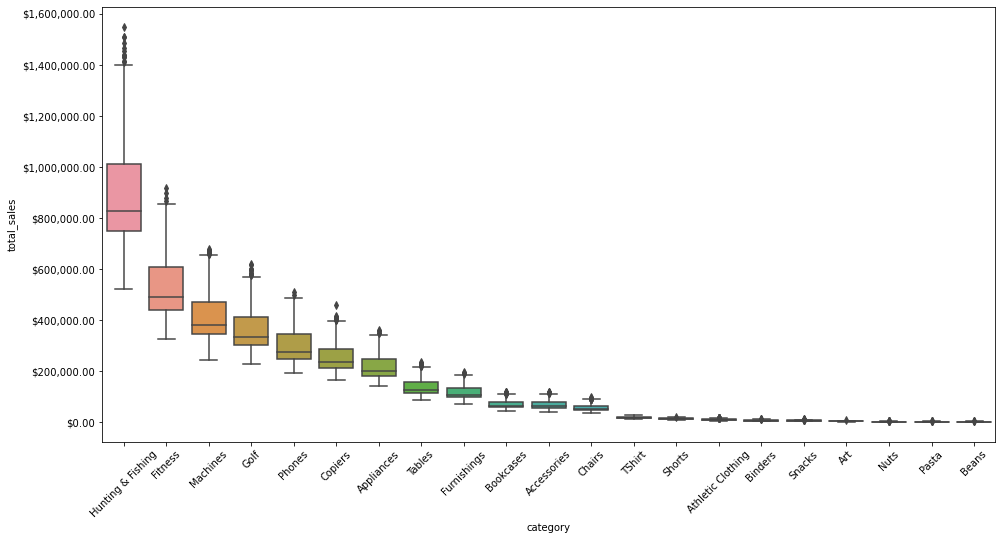

In [19]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.boxplot(x = 'category', y = 'total_sales', data = req4)
plt.xticks(rotation=45)
ax.yaxis.set_major_formatter('${x:,.2f}')

<div class="alert alert-block alert-danger">
    
    

### Requirement 5 (15 points): 
- Calculate the total number of orders per product category per Home Zip Code per purchase month. Sort by home zip code, cateogry and month and show the first 12 records. **( Use Python - SQL - Postgres )**
<br><br>
    
You can use either Python or SQL to create the month field. If you want to try SQL, here is one of many sources of info: https://www.postgresqltutorial.com/postgresql-extract/






<br>
    
</div>

In [20]:
query = '''SELECT homezipcode, category, count(*) as count, EXTRACT(month from purchasedate)::int as month
            FROM transactions_log 
            GROUP BY homezipcode, category, month
            LIMIT 12;'''

cursor.execute(query)
data = cursor.fetchall()

colnames = [desc[0] for desc in cursor.description]
#create dataframe with column headers
req5 = pd.DataFrame(data, columns = colnames)
req5

,homezipcode,category,count,month
0,10001,Accessories,23,1
1,10001,Accessories,31,2
2,10001,Accessories,8,3
3,10001,Accessories,10,4
4,10001,Accessories,8,5
5,10001,Accessories,22,6
6,10001,Accessories,15,7
7,10001,Accessories,11,8
8,10001,Accessories,14,9
9,10001,Accessories,17,10


<div class="alert alert-block alert-danger">

### Requirement 6 (15 points): 
    
- Use Seaborn (FacetGrid and scatterplot) to create six scatter plots, one for each zipcode in the list of zipcodes [60623, 60663, 60609, 60660, 60615, 60622]. 
- In each zippcode scatter plot, a dot represents the total annual sales of a product category. Use the parameter *hue* to assign colors to the different product categories.
    You will plot the total sales for these 5 categories: Athletic Clothing, Fitness, Golf, Hunting & Fishing, Shorts. 
- For each scatter plot, there should be *three* x values, one for each year: 2018, 2019, and 2020. Also for each year, there should be *five* dots corresponding to the total sales in that year for each of the *five* categories.
- **( Use Python - SQL - Postgres )**
    
<br>
Reference: https://seaborn.pydata.org/generated/seaborn.FacetGrid.html 
</div>

In [21]:
query = '''SELECT deliveryzipcode, category, EXTRACT(year from purchasedate)::int as year, sum(sales) as sales
            FROM transactions_log
            WHERE deliveryzipcode IN ('60623', '60663', '60609', '60660', '60615', '60622') AND 
            category IN ('Athletic Clothing', 'Fitness', 'Golf', 'Hunting & Fishing', 'Shorts')
            GROUP BY deliveryzipcode, category, year;'''

cursor.execute(query)
data = cursor.fetchall()

colnames = [desc[0] for desc in cursor.description]
#create dataframe with column headers
req6 = pd.DataFrame(data, columns = colnames)
req6.head()

,deliveryzipcode,category,year,sales
0,60609,Athletic Clothing,2018,5739.04
1,60609,Athletic Clothing,2019,6302.49
2,60609,Athletic Clothing,2020,6802.83
3,60609,Fitness,2018,274840.87
4,60609,Fitness,2019,359062.24


([<matplotlib.axis.XTick at 0x2da8a0df640>,
 [Text(2017.5, 0, '2017.5'),
  Text(2018.0, 0, '2018.0'),
  Text(2018.5, 0, '2018.5')])

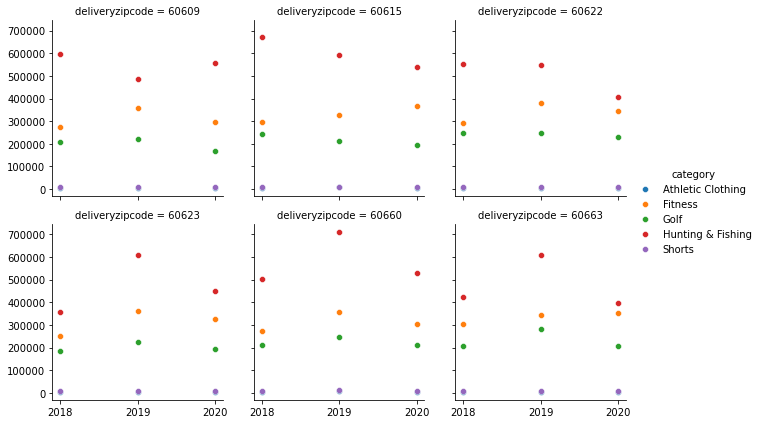

In [22]:
g=sns.FacetGrid(req6, col="deliveryzipcode", col_wrap=3, hue='category')
g.map_dataframe(sns.scatterplot, x="year", y="sales")
g.add_legend()
plt.xticks([2018, 2019, 2020])

<div class="alert alert-block alert-danger">
    
    
### Requirement 7 (5 points):
- List the top 10 distribution centers that have **highest** number of delayed deliveries? Show the distribution center ID, the city, the center's zip and the number of delayed deliveries. **( Use Python - SQL - Postgres )**





    
</div>

In [23]:
query = '''SELECT distribution_center_id, count(*) as num_late, city
            FROM logistics_supply_chain_network join transactions_log on zipcode=deliveryzipcode
            WHERE actualdeliverydate > expecteddeliverydate
            GROUP BY distribution_center_id, city
            ORDER BY num_late DESC
            LIMIT 10;'''

cursor.execute(query)
data = cursor.fetchall()

colnames = [desc[0] for desc in cursor.description]
#create dataframe with column headers
req7 = pd.DataFrame(data, columns = colnames)
req7

,distribution_center_id,num_late,city
0,DistributionCenter_14,74392,New York
1,DistributionCenter_6,72515,Chicago
2,DistributionCenter_19,70126,New York
3,DistributionCenter_22,61946,New York
4,DistributionCenter_21,61925,New York
5,DistributionCenter_94,58652,Atlanta
6,DistributionCenter_2,56545,Chicago
7,DistributionCenter_89,55854,Atlanta
8,DistributionCenter_95,52193,Atlanta
9,DistributionCenter_3,51651,Chicago


In [24]:
req7_2 =pd.merge(req7, centers[['facility_id','zipcode']], left_on='distribution_center_id', right_on='facility_id', how='left')
req7_2.drop(labels='facility_id', axis=1)

,distribution_center_id,num_late,city,zipcode
0,DistributionCenter_14,74392,New York,10250
1,DistributionCenter_6,72515,Chicago,60640
2,DistributionCenter_19,70126,New York,10257
3,DistributionCenter_22,61946,New York,10032
4,DistributionCenter_21,61925,New York,10286
5,DistributionCenter_94,58652,Atlanta,30326
6,DistributionCenter_2,56545,Chicago,60647
7,DistributionCenter_89,55854,Atlanta,30881
8,DistributionCenter_95,52193,Atlanta,30319
9,DistributionCenter_3,51651,Chicago,60657


<div class="alert alert-block alert-danger">
    
    

### Requirement 8 (15 points): 
- Find the most **influential product reviewer** for every product.
    - Note: the **influential product reviewer** is the customer who rated the product either 5 or 1, wrote a review for the product, has the highest number of friends, and shared it with the highest number of friends.  **( Use Python - SQL - Postgres )**
    - In the following example customer c3 is the most influential reviewer (list is sorted decending by the **count** of sharedwith and friends)

  
<dl>
<dt>Example:</dt>
<dd>1.   c3 : sharedwith=5, friends=10</dd>
<dd>2.   c1 : sharedwith=4, friends=15</dd>
<dd>3.   c2 : sharedwith=4, friends=10</dd>
<dd>4.   c5 : sharedwith=3, friends=12</dd>
<dd>5.   c4 : sharedwith=3, friends=10</dd>
        
</dl>





<br>
    
</div>

### Hints for Requirement 8
1. Select all your data
2. Parse the friends field to get a count and store in your dataframe
3. Parse the sharedwith field to get a count and store in your dataframe
4. Sort output by sharewith count and friends count
<br>

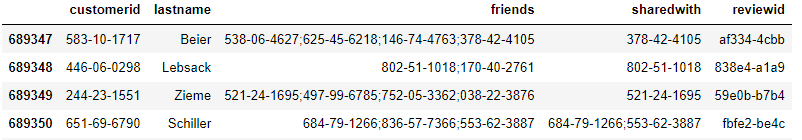

In [25]:
query = '''SELECT customerid, lastname, itempurchased, friends, sharedwith, reviewid
            FROM transactions_log
            WHERE (rating = 1 OR rating = 5);'''

cursor.execute(query)
data = cursor.fetchall()

colnames = [desc[0] for desc in cursor.description]
#create dataframe with column headers
req8 = pd.DataFrame(data, columns = colnames)
req8.head()

,customerid,lastname,itempurchased,friends,sharedwith,reviewid
0,758-59-2978,Williamson,Enermax Router - Bluetooth,342-12-7485;736-72-3716,342-12-7485,19d98-8bfc
1,370-61-5378,Jaskolski,Panasonic Cordless Phone,258-69-0717;224-23-5524,258-69-0717;224-23-5524,488ee-5335
2,267-77-6190,Beier,Muzzy LV-X Bowfishing Lever Bow and Kit Powere...,763-15-5548;674-99-8681;294-39-2465,,7414e-1c81
3,006-11-5868,Heidenreich,Body Rider Elliptical Trainer,433-95-1971;073-90-4722,433-95-1971,
4,823-55-5398,Koelpin,Avery Binding System,185-12-7686;353-29-2351,185-12-7686,


In [26]:
req8.replace('', np.nan, inplace = True)

In [27]:
req8.head()

,customerid,lastname,itempurchased,friends,sharedwith,reviewid
0,758-59-2978,Williamson,Enermax Router - Bluetooth,342-12-7485;736-72-3716,342-12-7485,19d98-8bfc
1,370-61-5378,Jaskolski,Panasonic Cordless Phone,258-69-0717;224-23-5524,258-69-0717;224-23-5524,488ee-5335
2,267-77-6190,Beier,Muzzy LV-X Bowfishing Lever Bow and Kit Powere...,763-15-5548;674-99-8681;294-39-2465,NaN,7414e-1c81
3,006-11-5868,Heidenreich,Body Rider Elliptical Trainer,433-95-1971;073-90-4722,433-95-1971,NaN
4,823-55-5398,Koelpin,Avery Binding System,185-12-7686;353-29-2351,185-12-7686,NaN


In [28]:
req8 = req8.dropna()
req8.head()

,customerid,lastname,itempurchased,friends,sharedwith,reviewid
0,758-59-2978,Williamson,Enermax Router - Bluetooth,342-12-7485;736-72-3716,342-12-7485,19d98-8bfc
1,370-61-5378,Jaskolski,Panasonic Cordless Phone,258-69-0717;224-23-5524,258-69-0717;224-23-5524,488ee-5335
10,530-14-7639,Homenick,Brite Conference Table - Assembled,376-62-7888;035-03-1079;391-38-9745;860-35-2451,376-62-7888,42a31-351e
18,821-51-2280,Hahn,AMS Bowfishing Crossbow Carp Kit - Right Hand,086-98-6398;229-07-1813,229-07-1813,db7cb-b8f9
19,327-99-9231,Jacobi,StarTech Card Printer - White,746-51-0433;521-92-1329;729-94-1103;164-68-1521,746-51-0433;521-92-1329;729-94-1103;164-68-1521,eb0b3-fc62


In [29]:
req8['friend_count'] = req8['friends'].str.split(';').str.len()
req8['sharedwith_count'] = req8['sharedwith'].str.split(';').str.len()
req8 = req8.sort_values(by=['itempurchased','sharedwith_count', 'friend_count'], ascending=[True, False, False]).reset_index(drop=True)

In [30]:
req8.head(10)

,customerid,lastname,itempurchased,friends,sharedwith,reviewid,friend_count,sharedwith_count
0,765-11-1596,Friesen,1TB Portable External Hard Drive,761-53-2643;767-97-8613;797-11-7600;728-98-2961,761-53-2643;767-97-8613;797-11-7600;728-98-2961,8c2b3-3f8f,4,4
1,399-88-8349,Schuppe,1TB Portable External Hard Drive,820-23-9576;342-46-7021;693-82-5664;358-53-1557,820-23-9576;342-46-7021;693-82-5664;358-53-1557,c0dc9-acc2,4,4
2,621-86-1270,Nikolaus,1TB Portable External Hard Drive,465-08-0667;503-01-5056;439-14-9798;238-81-0485,465-08-0667;503-01-5056;439-14-9798;238-81-0485,e1dbd-946c,4,4
3,302-36-9272,Williamson,1TB Portable External Hard Drive,430-78-5236;535-76-5698;466-28-3842;233-52-9402,430-78-5236;535-76-5698;466-28-3842;233-52-9402,fcf5a-e281,4,4
4,043-45-7983,Hirthe,1TB Portable External Hard Drive,322-37-1642;866-50-2214;202-70-6772;306-18-9069,322-37-1642;866-50-2214;202-70-6772;306-18-9069,1160c-88fb,4,4
5,779-03-0102,Bogisich,1TB Portable External Hard Drive,597-14-9064;814-78-9342;708-76-5563;880-05-5087,597-14-9064;814-78-9342;708-76-5563;880-05-5087,1f4e0-7bb8,4,4
6,246-43-0261,Goyette,1TB Portable External Hard Drive,609-57-4842;367-64-0959;274-32-6797;672-65-3470,609-57-4842;367-64-0959;274-32-6797;672-65-3470,b6a21-b486,4,4
7,301-54-5438,Koelpin,1TB Portable External Hard Drive,423-65-3736;775-75-1363;652-22-3430;361-89-2590,423-65-3736;775-75-1363;652-22-3430;361-89-2590,1accd-6452,4,4
8,563-16-3553,Gottlieb,1TB Portable External Hard Drive,539-87-6975;501-19-3841;222-15-9338;412-22-0367,539-87-6975;501-19-3841;222-15-9338;412-22-0367,6c9e8-3a5c,4,4
9,535-58-4068,Rempel,1TB Portable External Hard Drive,784-35-2024;409-53-0626;326-01-3526;498-97-2711,784-35-2024;409-53-0626;326-01-3526;498-97-2711,b03aa-1a25,4,4


In [46]:
req8[req8['lastname'].str.isalpha()]

,customerid,lastname,itempurchased,friends,sharedwith,reviewid,friend_count,sharedwith_count
0,765-11-1596,Friesen,1TB Portable External Hard Drive,761-53-2643;767-97-8613;797-11-7600;728-98-2961,761-53-2643;767-97-8613;797-11-7600;728-98-2961,8c2b3-3f8f,4,4
1,399-88-8349,Schuppe,1TB Portable External Hard Drive,820-23-9576;342-46-7021;693-82-5664;358-53-1557,820-23-9576;342-46-7021;693-82-5664;358-53-1557,c0dc9-acc2,4,4
2,621-86-1270,Nikolaus,1TB Portable External Hard Drive,465-08-0667;503-01-5056;439-14-9798;238-81-0485,465-08-0667;503-01-5056;439-14-9798;238-81-0485,e1dbd-946c,4,4
3,302-36-9272,Williamson,1TB Portable External Hard Drive,430-78-5236;535-76-5698;466-28-3842;233-52-9402,430-78-5236;535-76-5698;466-28-3842;233-52-9402,fcf5a-e281,4,4
4,043-45-7983,Hirthe,1TB Portable External Hard Drive,322-37-1642;866-50-2214;202-70-6772;306-18-9069,322-37-1642;866-50-2214;202-70-6772;306-18-9069,1160c-88fb,4,4
...,...,...,...,...,...,...,...,...
422767,281-53-9291,Osinski,adidas Women's Running Response Long Sleeve Tee,706-10-3498,706-10-3498,04ef2-811a,1,1
422768,539-77-6739,Rempel,adidas Women's Running Response Long Sleeve Tee,693-42-0080,693-42-0080,daaf2-a79a,1,1
422769,140-93-4429,Deckow,adidas Women's Running Response Long Sleeve Tee,212-31-0721,212-31-0721,5c17a-cb9c,1,1
422770,175-71-6842,Grant,adidas Women's Running Response Long Sleeve Tee,242-48-1687,242-48-1687,84d8c-5413,1,1


In [44]:
a_list = ["Grant", "Rempel"]

req8[req8['lastname'].isin(a_list)]

,customerid,lastname,itempurchased,friends,sharedwith,reviewid,friend_count,sharedwith_count
9,535-58-4068,Rempel,1TB Portable External Hard Drive,784-35-2024;409-53-0626;326-01-3526;498-97-2711,784-35-2024;409-53-0626;326-01-3526;498-97-2711,b03aa-1a25,4,4
55,269-47-3363,Grant,1TB Portable External Hard Drive,524-91-6637;837-60-5774;269-31-4174;116-25-5668,524-91-6637;837-60-5774;269-31-4174,9d8a6-8e6c,4,3
186,618-18-2487,Rempel,1TB Portable External Hard Drive,486-81-9509;762-46-4437;194-99-7301,486-81-9509;762-46-4437;194-99-7301,c5c18-0a96,3,3
362,508-51-1123,Rempel,1TB Portable External Hard Drive,892-86-6905;454-40-8712;205-78-3296;241-23-7828,892-86-6905;241-23-7828,80a0b-f35f,4,2
413,713-44-8713,Rempel,1TB Portable External Hard Drive,584-39-6749;782-12-7504;615-56-7790;522-07-4709,615-56-7790;522-07-4709,73baf-30c5,4,2
...,...,...,...,...,...,...,...,...
421306,823-83-0477,Grant,adidas Women's Running Response Long Sleeve Tee,576-20-3251;730-06-0673,576-20-3251,13578-0695,2,1
421787,519-39-7877,Rempel,adidas Women's Running Response Long Sleeve Tee,034-47-5076,034-47-5076,cf47f-bcd6,1,1
422533,572-91-0872,Grant,adidas Women's Running Response Long Sleeve Tee,799-15-0543,799-15-0543,e0ad6-7b4b,1,1
422768,539-77-6739,Rempel,adidas Women's Running Response Long Sleeve Tee,693-42-0080,693-42-0080,daaf2-a79a,1,1
